<a href="https://colab.research.google.com/github/SachinScaler/ProbAndStats_Sep24/blob/main/CLT_and_Confidence_Interval%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo -O weight-height.csv


--2024-10-05 02:23:35--  https://drive.google.com/uc?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.google.com (drive.google.com)... 142.251.16.139, 142.251.16.113, 142.251.16.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo [following]
--2024-10-05 02:23:35--  https://drive.usercontent.google.com/download?id=1Mrt008vkE4nVb1zE4f06_rtq70QPfkIo
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.31.132, 2607:f8b0:4004:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.31.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428120 (418K) [application/octet-stream]
Saving to: ‘weight-height.csv’

weight-height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.02s   

2024-10-05 02:23:38 (16.4 MB/

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm


df_train = pd.read_csv('weight-height.csv')
df_train.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height', ylabel='Count'>

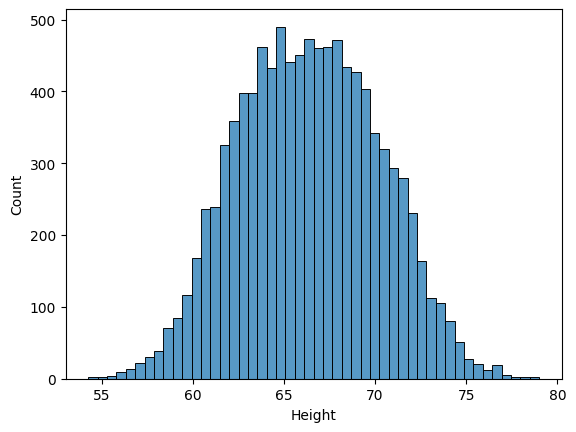

In [4]:
sns.histplot(df_train['Height'])

<Axes: xlabel='Weight', ylabel='Count'>

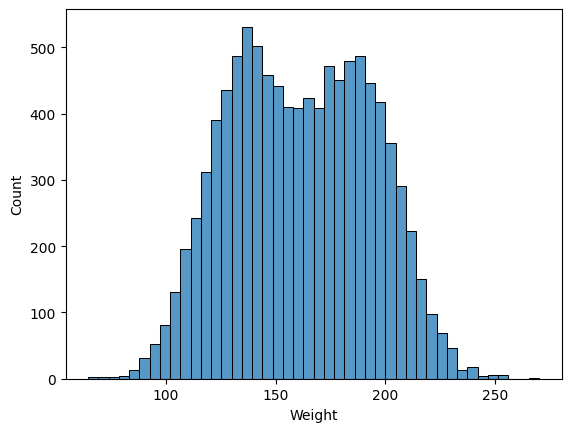

In [5]:
sns.histplot(df_train['Weight'])

In [6]:
mu, sigma = df_train['Weight'].mean(),  df_train['Weight'].std()
print("Population:", mu, sigma)

Population: 161.44035683283076 32.108439006519546


### Let's do sampling

In [7]:
n = 5

df_train['Weight'].sample(n)

,Weight
4362,184.508238
8026,147.204548
1761,151.350572
8556,137.103401
2824,208.381539


In [8]:
np.mean(df_train['Weight'].sample(n))

174.4025634587606

In [16]:
sd_5 = []

for i in range(1000):
    sd_5.append(np.mean(df_train['Weight'].sample(n)))


sd_5 = np.array(sd_5)
len(sd_5)

1000

<Axes: ylabel='Count'>

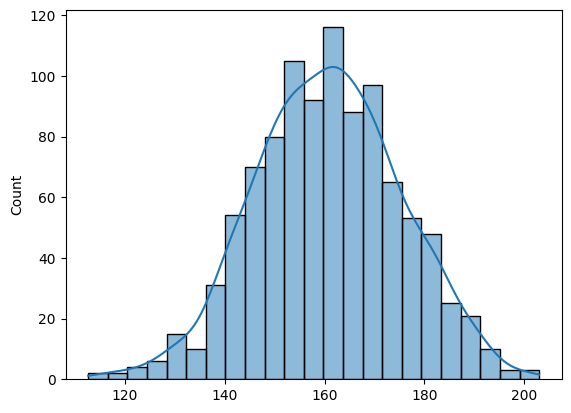

In [17]:
sns.histplot(sd_5, kde=True)

In [18]:
mu, sigma = sd_5.mean(), sd_5.std()
print(f"SD {n}:", mu, sigma)

SD 5: 160.75795383234393 14.559326340326102


In [25]:
n = 20
sd_20 = []

for i in range(1000):
    sd_20.append(np.mean(df_train['Weight'].sample(n)))


sd_20 = np.array(sd_20)
len(sd_20)

1000

<Axes: ylabel='Count'>

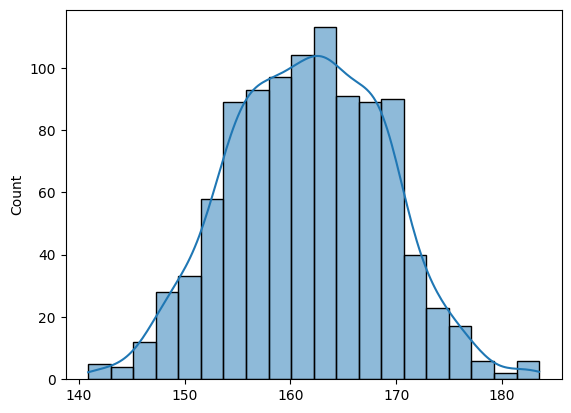

In [26]:
sns.histplot(sd_20, kde=True)

In [27]:
mu, sigma = sd_20.mean(), sd_20.std()
print(f"SD {n}:", mu, sigma)

SD 20: 161.61724361697435 7.265358702132394


In [32]:
# quiz
x = 75
mu = 80
n = 50
sig_sample = 15

se = sig_sample/np.sqrt(n)
print(se)

2.1213203435596424


In [33]:
z = (x - mu)/se
print(z)

-2.3570226039551585


In [35]:
from scipy.stats import norm

norm.cdf(z)

0.009211062727049501

In [36]:
norm.ppf(0.025)

-1.9599639845400545

In [37]:
norm.ppf(1 - 0.025)

1.959963984540054

In [38]:
mu = 65
se = 0.25
norm.interval(0.95, loc=mu, scale=se)

(64.51000900386498, 65.48999099613502)